In [3]:
import numpy as np
from matplotlib import pyplot as plt
import spectrum

# DOSUE-K

In [6]:
gain = 10.**(62*0.1) #  62 dB
freq, y, yerr = spectrum.create_spectrum(
        chi  = 1.e-9,
        T_noise = 100,
        gain = gain,
        time = 24., # sec
        freq_0 = 20.e+9, # [Hz] peak position
        freq_binwidth = 20.e+3, # [Hz] frequency bin width
        rebin = 1,
        A_eff= 17*1.e-4, # [m^2]
        freq_half_scale = 0.5, # freq_0*scale = freq span/2.
        doPlot=False);

chi     = 1e-09
A_eff   = 17.0 [cm^2]
gain    = +62.000000 [dB]
T_noise = 100 [K]
d_nu    = 20.0 [kHz]
P_DP    = 8.648429519355713e-12 [W] (After *gain)
Noise   = 8.933212346470057e-14 [W] (After *gain)
Noise floor  = 4.37636240255649e-11 [W] (After *gain)
freq_center [10.      10.00002 10.00004 ... 29.99996 29.99998 30.     ]
power [4.36958610e-11 4.38093025e-11 4.38928920e-11 ... 4.37713254e-11
 4.38058580e-11 4.38386294e-11]


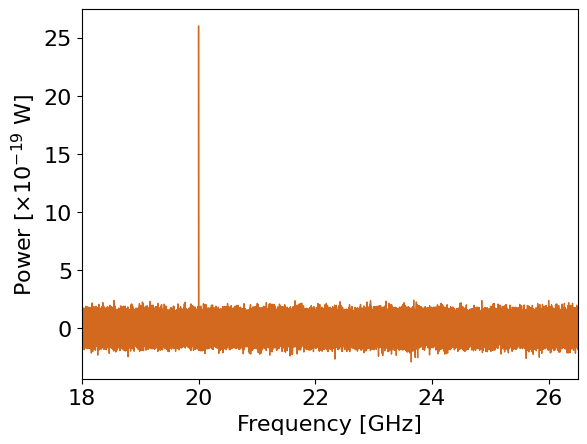

In [7]:
ymean = np.mean(y)
plt.plot(freq*1e-9, (y-ymean)*1e+19/gain, linewidth=1, color='chocolate')
plt.xlim(18.,26.5)
plt.tick_params(labelsize=16)
plt.xlabel('Frequency [GHz]', fontsize=16)
plt.ylabel(r'Power [$ \times 10^{-19}~\mathrm{W}$]', fontsize=16)
plt.savefig('figure/sim_spectrum_dosue-k1.pdf')

In [46]:
gain = 10.**(62*0.1) #  62 dB
freq, y, yerr = spectrum.create_spectrum(
        chi  = 10.e-10,
        T_noise = 100,
        gain = gain,
        time = 24., # sec
        freq_0 = 20.e+9, # [Hz] peak position
        freq_binwidth = 300, # [Hz] frequency bin width
        rebin = 1,
        A_eff= 17*1.e-4, # [m^2]
        freq_half_scale = 0.5, # freq_0*scale = freq span/2.
        doPlot=False);
y = y/gain

chi     = 1e-09
A_eff   = 17.0 [cm^2]
gain    = +62.000000 [dB]
T_noise = 100 [K]
d_nu    = 0.3 [kHz]
P_DP    = 8.648429519355713e-12 [W] (After *gain)
Noise   = 1.0940906006391224e-14 [W] (After *gain)
Noise floor  = 6.564543603834735e-13 [W] (After *gain)
freq_center [10.0000001 10.0000004 10.0000007 ... 29.9999993 29.9999996 29.9999999]
power [6.54900606e-13 6.55252782e-13 6.75443395e-13 ... 6.73234710e-13
 6.46900961e-13 6.37752248e-13]


Power [$ \times 10^{-19}~\mathrm{W}$]


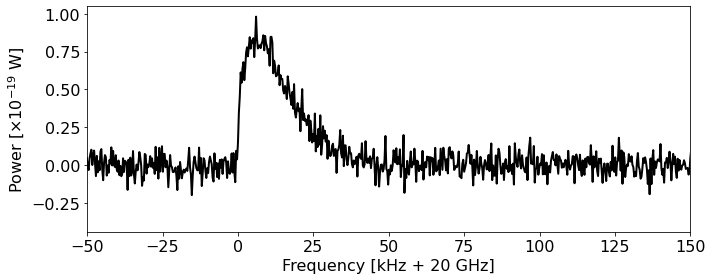

In [52]:
ymean = np.mean(y)
fconv = 1e-3
foffset = 20e+9 # Hz
yscale = 19
funit = 'kHz'
foffset_label = '20 GHz'
fig = plt.figure(figsize=(10,4))
plt.plot((freq-foffset)*fconv, (y-ymean)*(10**yscale), linewidth=2, color='black')
plt.xlim(-50e+3*fconv,150e+3*fconv)
plt.tick_params(labelsize=16)
plt.xlabel(f'Frequency [{funit} + {foffset_label}]', fontsize=16)
ylabel = r'Power [$ \times 10^{-'+f'{yscale}'+r'}~\mathrm{W}$]'
print(ylabel)
plt.ylabel(ylabel, fontsize=16)
plt.tight_layout()
plt.savefig('figure/sim_spectrum_dosue-K2.pdf')

# DOSUE-Y

In [12]:
gain = 10.**(60*0.1) #  60 dB
# prototype
'''
freq, y, yerr = spectrum.create_spectrum(
        chi  = 1.e-8,
        T_noise = 300*2+100,
        gain = gain,
        time = 600., # sec
        freq_0 = 200.e+9, # [Hz] peak position
        freq_binwidth = 20.e+3, # [Hz] frequency bin width
        rebin = 1,
        A_eff= (0.71/2.)**2*np.pi * 0.5  * 1e-4, # [m^2] VDI horn antenna, eff=0.5
        freq_half_scale = 0.5, # freq_0*scale = freq span/2.
        doPlot=False)
'''
# kiban-A
freq, y, yerr = spectrum.create_spectrum(
        chi  = 7.e-11,
        T_noise = (100+50)*2,
        gain = gain,
        time = 3600.*24*7, # sec
        freq_0 = 200.e+9, # [Hz] peak position
        freq_binwidth = 20.e+3, # [Hz] frequency bin width
        rebin = 1,
        A_eff= (15/2.)**2*np.pi * 0.5  * 1e-4, # [m^2] phi15cm, eff=0.5
        freq_half_scale = 0.5, # freq_0*scale = freq span/2.
        doPlot=False)

chi     = 7e-11
A_eff   = 88.35729338221293 [cm^2]
gain    = +60.000000 [dB]
T_noise = 300 [K]
d_nu    = 20.0 [kHz]
P_DP    = 1.3897184169004854e-13 [W] (After *gain)
Noise   = 1.0651938291090612e-15 [W] (After *gain)
Noise floor  = 8.283894e-11 [W] (After *gain)
freq_center [100.      100.00002 100.00004 ... 299.99996 299.99998 300.     ]
power [8.28379622e-11 8.28392812e-11 8.28389761e-11 ... 8.28370860e-11
 8.28391265e-11 8.28385889e-11]


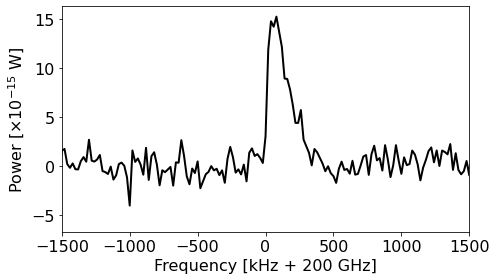

In [13]:
ymean = np.mean(y)
dfreq = 1.5e+6 # Hz
fconv = 1e-3
foffset = 200e+9 # Hz
funit = 'kHz'
foffset_label = '200 GHz'
fig = plt.figure(figsize=(7,4))
plt.plot((freq-foffset)*fconv, (y-ymean)*1e+15, linewidth=2, color='black')
plt.xlim(-dfreq*fconv,dfreq*fconv)
plt.tick_params(labelsize=16)
plt.xlabel(f'Frequency [{funit} + {foffset_label}]', fontsize=16)
plt.ylabel(r'Power [$ \times 10^{-15}~\mathrm{W}$]', fontsize=16)
plt.tight_layout()
plt.savefig('figure/sim_spectrum_dosue-A.pdf')

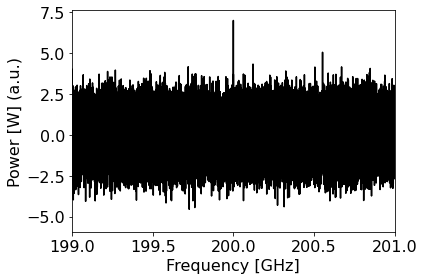

In [6]:
ymean = np.mean(y)
plt.plot(freq*1e-9, (y-ymean)*1e+15, linewidth=1.5, color='black')
plt.xlim(199.,201)
plt.tick_params(labelsize=16)
plt.xlabel('Frequency [GHz]', fontsize=16)
plt.ylabel(r'Power [W] (a.u.)', fontsize=16)
plt.tight_layout()
plt.savefig('figure/sim_spectrum_dosue-A2.pdf')

# DOSUE-J

In [22]:
gain = 10.**(60*0.1) #  60 dB
freq, y, yerr = spectrum.create_spectrum(
        chi  = 3e-10,
        T_noise = 300,
        gain = gain,
        time = 24., # sec
        freq_0 = 14.e+9, # [Hz] peak position
        freq_binwidth = 2.e+3, # [Hz] frequency bin width
        rebin = 1,
        A_eff= 10**2 *1.e-4, # [m^2] (123.8 x 91.9 mm)
        freq_half_scale = 0.5, # freq_0*scale = freq span/2.
        doPlot=False);

chi     = 3e-10
A_eff   = 100.0 [cm^2]
gain    = +60.000000 [dB]
T_noise = 300 [K]
d_nu    = 2.0000000000000004 [kHz]
P_DP    = 2.88888888888889e-12 [W] (After *gain)
Noise   = 5.3472305839579247e-14 [W] (After *gain)
Noise floor  = 8.283894000000002e-12 [W] (After *gain)
freq_center [ 7.        7.000002  7.000004 ... 20.999996 20.999998 21.      ]
power [8.27684795e-12 8.27835072e-12 8.17353524e-12 ... 8.28028188e-12
 8.26788328e-12 8.27725063e-12]


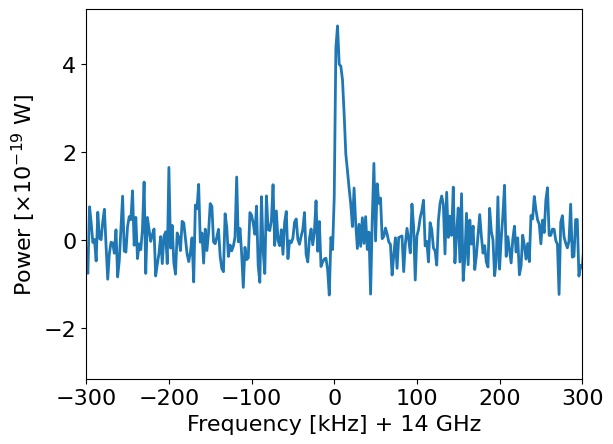

In [25]:
ymean = np.mean(y)
freq_center = 14.0e+9
plt.plot( (freq - freq_center)*1e-3, (y-ymean)*1e+19/gain, linewidth=2, color='tab:blue')
plt.xlim(-300,+300)
plt.tick_params(labelsize=16)
plt.xlabel(f'Frequency [kHz] + {freq_center*1e-9:.0f} GHz', fontsize=16)
plt.ylabel(r'Power [$ \times 10^{-19}~\mathrm{W}$]', fontsize=16)
plt.savefig('figure/sim_spectrum_dosue-J.pdf')